<a href="https://colab.research.google.com/github/gwillig/data_analyse_friends_allergy/blob/master/allergy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Allergy



To Do:
* Logistic regression <br>
https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8 


In [ ]:
'#1.Step: Load the need libs'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
'#2.Step: Authorize colab to access the spread sheet'
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())


wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1zO7IJQdqzMMF_eAo0xWo_jKa8HBP8InlgcAoscJFC1c/edit?usp=sharing')

In [ ]:
'#3.Step: Load the data from the speadsheet'
sheet = wb.worksheet('current')
data = sheet.get_all_values()
df = pd.DataFrame(data)



## Pre-processing of df



In [ ]:
'#3.1.Step: Transpose the dataframe (switch rows with columns)'
df_t = df.T
'#3.2.Step: Make the first row to header of the sheet'
headers = df_t.iloc[0]
df_new  = pd.DataFrame(df_t.values[1:], columns=headers)

'#3.1.Step: Repalce n.a.n with nan'
df_nan = df_new.replace("n.a.n",np.nan)
'#3.2.Step: Drop rows with nan'
df_non = df_nan.dropna()
'#3.3.SteP: Convert the Datum column to datetime obj'
df_non["Datum_obj"] = pd.to_datetime(df_non["Datum"], format='%d.%m.%Y', errors='ignore')


'#3.4.Step: Replace all values to 0 ,1 '
df_non = df_non.replace({'n.a.n.':np.nan, 'FALSE':0, 'TRUE':1,'0':0, '1':1, 'keine':0, 'schwach':1 })
display(df_non)

,Datum,Eier,"Eier, Zwiebeln und Brot",,,Gerichte Knorr Maggi,Tomatensuppe,Nudeln mit Tomatensoße,Nudelsuppe,"Suppe Griesklöschen, Nudeln, Süßkartoffel",,Gerichte Hofmann,Wildlachs mit Reis,Lachs mit Gemüse und Schupfnudeln,Zwiebelschnitzel und Kroketten,"Pfannkuchen, Hackfleisch, Blumenkohl",Rote Linsensuppe,Spinat und gefüllte Kartoffeltashen,Spinat und Kartoffelauflauf,"Hähnchenbrustfilet, Kartoffelspalten und Grillgrmüse",Reis,Reis mit Erdnuss Tikka,Linsen und Spätzle,Lasagne,Chili,Tortellini,Nudeln mit Tomatensoße,"Nudeln, Schnitzel, Hirtenkäse","Püree, Hähnchen, Brokkoli",Obst | Früchtte,Orange,Zitrone,Apfel,Birne,Aprikosen,Nektarinen,Erdbeeren,Heidelbeeren,Bananensaft,Mango,...,Kräutertee,Ingwertee,Pfefferminztee,"Fenchel, Anis, Kümmeltee",Pfirsich Vanille Meßmer Tee,Entspannung Tee,Allergiesymptome,juckende Kopfhaut,juckende Haut nach Baden,juckende Haut,juckende Nase oder Schnupfen,Juckende Augen nach Baden,juckende Augen,Starke Allergie,Allergietablette genommen,Ausschlag nach Joggen auf Brust und Rücken,Pickel,Starke Allergie nach Schlafen,Halsschmerzen,Gustav berührt mich Ausschlag auf Haut,Leichte hibbel Gesicht,Starker Ausschlag Rücken,Dunkle Augenringe,Allergie Gräser,Ambrosia,Ampfer,Beifuß,Birke,Buche,Eiche,Erle,Esche,Gräser,Hasel,Pappel,Roggen,Ulme,Wegerich,Weide,Datum_obj
0,27.03.2020,,0.0,,,,0.0,,0.0,0.0,,,,1.0,,,,,,,,0.0,0.0,0.0,0.0,,,,,,,,,0.0,,,0.0,0.0,0.0,0.0,...,,,,,0,,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0,,0,0,0,0,0,0,,0,0,0,1,0,0,0,1,0,0,stark,0,stark,0,stark,2020-03-27
1,28.03.2020,,0.0,,,,0.0,,0.0,0.0,,,,0.0,,,,,,,,0.0,0.0,0.0,0.0,,,,,,,,,0.0,,,0.0,0.0,0.0,0.0,...,,,,,0,,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0,,0,0,0,0,0,0,,0,0,0,1,0,0,0,1,0,0,stark,0,stark,0,stark,2020-03-28
2,29.03.2020,,1.0,,,,0.0,,0.0,0.0,,,,0.0,,,,,,,,0.0,0.0,0.0,0.0,,,,,,,,,0.0,,,0.0,0.0,0.0,0.0,...,,,,,0,,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0,,0,0,0,0,0,0,,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,2020-03-29
3,30.03.2020,,0.0,,,,1.0,,0.0,0.0,,,,0.0,,,,,,,,0.0,0.0,0.0,0.0,,,,,,,,,0.0,,,0.0,0.0,0.0,0.0,...,,,,,0,,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0,,0,0,0,0,0,0,,0,0,0,1,0,0,0,1,0,0,stark,0,stark,0,stark,2020-03-30
4,31.03.2020,,0.0,,,,0.0,,1.0,0.0,,,,0.0,,,,,,,,0.0,0.0,0.0,0.0,,,,,,,,,1.0,,,0.0,0.0,0.0,0.0,...,,,,,0,,1.0,1.0,1.0,0.0,0.0,,0.0,0.0,0.0,0,,0,0,0,0,0,0,,0,0,0,0,0,0,0,1,0,0,mittel,0,mittel,0,mittel,2020-03-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,30.07.2020,0,0.0,0,0,0,0.0,0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,,,,,,,,,,0,stark,1,0,0,0,0,0,mittel,0,0,0,0,stark,0,2020-07-30
125,31.07.2020,0,0.0,0,0,0,0.0,0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,,,,,,,,,,0,stark,1,0,0,0,0,0,mittel,0,0,0,0,stark,0,2020-07-31
126,01.08.2020,0,0.0,0,0,0,0.0,0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0,1.0,0.0,0.0,,,,,,,,,,0,stark,mittel,0,0,0,0,0,mittel,0,0,0,0,stark,0,2020-08-01
127,02.08.2020,0,0.0,0,0,0,0.0,0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,,,,,,,,,,0,mittel,1,0,0,0,0,0,1,0,0,0,0,mittel,0,2020-08-02


# Pre-processing: Allergiesynt.

In [ ]:
## Clean the data
allergie_columns=['juckende Kopfhaut',
 'juckende Haut nach Baden',
 'juckende Haut',
 'juckende Nase oder Schnupfen ',
 'juckende Augen ',
 'Starke Allergie ',
 'Allergietablette genommen ',
 'Ausschlag nach Joggen auf Brust und Rücken ',
 'Starke Allergie nach Schlafen',
 'Halsschmerzen ',
 'Gustav berührt mich Ausschlag auf Haut ',
 'Leichte hibbel Gesicht ',
 'Starker Ausschlag Rücken ',
 'Dunkle Augenringe',
 'Allergie Gräser',]

df_non[allergie_columns] = df_non[allergie_columns].replace({"FALSE":0,"1":1,"TRUE":1,"0":0,"n.a.n.":np.nan,"":0})

def get_unique_values_df(df):
  column_values = df.values.ravel()
  unique_values =  pd.unique(column_values)
  return(unique_values)
# df_nan = df_non.dropna()
# df_nan.shape

## Pre-process the pollen allergy

In [ ]:
def get_unique_values_df(df):
  column_values = df.values.ravel()
  unique_values =  pd.unique(column_values)
  list_unique = list(unique_values)
  '#Remove all date and Timestamp types'
  for x in list_unique[:]:
    if type(x)==str:    
      if "2020" in x:
        list_unique.pop(list_unique.index(x))
    if pd._libs.tslibs.timestamps.Timestamp==type(x):
      list_unique.pop(list_unique.index(x))
  return(list_unique)


get_unique_values_df(df_non)


['', 0.0, 1.0, 'stark', 'mittel', nan, 'keine ', 'schach']

In [ ]:
# Comine all syntome
# df_nan = df_non.dropna()
# df_nan[allergie_columns].sum().plot.pie()



pollen = ['Ambrosia',
 'Ampfer',
 'Beifuß',
 'Birke',
 'Buche',
 'Eiche',
 'Erle',
 'Esche',
 'Gräser',
 'Hasel',
 'Pappel',
 'Roggen',
 'Ulme',
 'Wegerich',
 'Weide',]

df_non[pollen] = df_non[pollen].replace({"Keine":0,"Schwach":1,"mittel":1,"stark":1,'keine ':0})
# df_nan.to_excel('df_nan.xlsx')

# files.download('df_nan.xlsx')

# Check Pre-processing


In [ ]:
#Now there should be only ['', 0.0, 1.0, nan] in the df

get_unique_values_df(df_non)

['', 0.0, 1.0, nan, 'schach']

# EDA

In [ ]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
allergie_dict =  {i:item for i,item in enumerate(allergie_columns)}
pp.pprint(allergie_dict)

{   0: 'juckende Kopfhaut',
    1: 'juckende Haut nach Baden',
    2: 'juckende Haut',
    3: 'juckende Nase oder Schnupfen ',
    4: 'juckende Augen ',
    5: 'Starke Allergie ',
    6: 'Allergietablette genommen ',
    7: 'Ausschlag nach Joggen auf Brust und Rücken ',
    8: 'Starke Allergie nach Schlafen',
    9: 'Halsschmerzen ',
    10: 'Gustav berührt mich Ausschlag auf Haut ',
    11: 'Leichte hibbel Gesicht ',
    12: 'Starker Ausschlag Rücken ',
    13: 'Dunkle Augenringe',
    14: 'Allergie Gräser'}


In [ ]:
df_test = pd.DataFrame({"a":[1,0,0,0],"b":[1,1,0,0],"c":[1,0,0,0]})
df_test
def fn(row):
  """
  Combine serveral columns to see if one of the synptome appear.
  """
  if row.sum()>=1:
      return 1
  else:
      return 0

df_test['one_more_synptome'] = df_test.apply(fn, axis=1)
df_test

,a,b,c,one_more_synptome
0,1,1,1,1
1,0,1,0,1
2,0,0,0,0
3,0,0,0,0


In [ ]:
df_non[allergy_symptome].apply(fn, axis=1)

0      0
1      0
2      0
3      0
4      1
      ..
124    1
125    0
126    1
127    1
128    0
Length: 129, dtype: int64

In [ ]:
'#Select all row where allergy symptome where 1 and sum the columns ' 

allergy_symptome = [allergie_dict[x] for x in [0,1,2,3,4,5,7,8,10,11,12]]
#####################

#Create  a new column which contains if allergy syntomes appear or not
df_non["total_amount"] = df_non[allergy_symptome].apply(fn, axis=1)

'#Drop all allergie rows'
df_symptome = df_symptome.drop(columns=allergie_columns)
df_symptome_sum = df_symptome.drop(columns=["Datum","Datum_obj"]).sum(axis=0) 

df_result_symptome = pd.DataFrame.from_dict({"attribute":df_symptome_sum.keys(),
                                 "sum":df_symptome_sum.values
                                } )


'#Drop all row with a sum of ""'
df_result_symptome = df_result_symptome[df_result_symptome["sum"] != ""]
'#Select all rows with 0'
df_symptome_zero =  df_result_symptome[df_result_symptome["sum"] ==0]
print(list(df_symptome_zero["attribute"]))
######################
'Now we can check if a certian item is in the list'
'Nudelsuppe' in list(df_symptome_zero["attribute"])

'#Select all row !=0 and sort them'
df_symptome_1=  df_result_symptome[df_result_symptome["sum"] !=0].sort_values("sum",ascending=False)
'#Calculate percentage'
df_symptome_1["percent"]=df_symptome_1["sum"]/float(df_result_symptome[["sum"]].sum(axis=0))*100
df_symptome_1["percent"] = df_symptome_1["percent"].astype(float)
df_symptome_1["percent"]=df_symptome_1["percent"].round()
plt.pie(x=df_symptome_1["sum"],labels=df_symptome_1["attribute"])
df_symptome_1



AttributeError: ignored

In [ ]:
df_result_symptome

,attribute,sum
0,Eier,0
1,"Eier, Zwiebeln und Brot",1
2,,0
3,,0
4,Gerichte Knorr Maggi,0
...,...,...
326,Pappel,0
327,Roggen,0
328,Ulme,0
329,Wegerich,1


In [ ]:


import pprint
pp = pprint.PrettyPrinter(indent=4)
object_list = list(df_non.drop(columns=allergie_columns).keys())
object_dict =  {i:item for i,item in enumerate(object_list)}
pp.pprint(object_dict)
object_list.remove('Datum')

In [ ]:
'#Select all object to find out which allergy sympotme it caused' 

object_item = object_dict[281]
#####################
df_symptome= df_non[df_non[object_item]==1]
'#Drop all allergie rows'
df_symptome = df_symptome.drop(columns=object_list)

df_symptome_sum = df_symptome.sum(axis=0) 

df_result_symptome = pd.DataFrame.from_dict({"attribute":df_symptome_sum.drop("Datum").keys(),
                                 "sum":df_symptome_sum.drop("Datum").values
                                } )


'#Drop all row with a sum of ""'
df_result_symptome = df_result_symptome[df_result_symptome["sum"] != ""]
'#Select all rows with 0'
df_symptome_zero =  df_result_symptome[df_result_symptome["sum"] ==0]
print(list(df_symptome_zero["attribute"]))
######################
'Now we can check if a certian item is in the list'
'Nudelsuppe' in list(df_symptome_zero["attribute"])

'#Select all row !=0 and sort them'
df_symptome_1=  df_result_symptome[df_result_symptome["sum"] !=0].sort_values("sum",ascending=False)
'#Calculate percentage'
df_symptome_1["percent"]=df_symptome_1["sum"]/float(df_result_symptome[["sum"]].sum(axis=0))*100
df_symptome_1["percent"] = df_symptome_1["percent"].astype(float)
df_symptome_1["percent"]=df_symptome_1["percent"].round()
plt.pie(x=df_symptome_1["sum"],labels=df_symptome_1["attribute"])
df_symptome_1

In [ ]:
sum

In [ ]:
### Make sum allergie
df_non['allergie_total'] = df_non[allergie_columns].sum(axis=1)

df_non.loc[df_non['allergie_total'] !=0.0, 'allergie_total_norm'] = 1
df_non['allergie_total_norm'] = df_non['allergie_total'].apply(lambda x: 1 if x >0.0 else 0)
df_non["allergie_total_norm"]

In [ ]:
import os
os.listdir(os.getcwd())
df_con_pre.to_csv("test.csv")
from google.colab import files
files.download('test.csv') 

In [ ]:
import scipy.stats as stats

def get_unique_values_df(df):
  column_values = df.values.ravel()
  unique_values =  pd.unique(column_values)
  print(unique_values)
#Remove all duplicate columns
df_nan = df_nan.loc[:,~df_nan.columns.duplicated()]
df_con = df_nan.drop(columns=["Datum_obj", "Datum"])  

df_con_pre = df_con.replace({"FALSE":0,"1":1,"TRUE":1,"0":0,"n.a.n.":np.nan,"":0})
get_unique_values_df(df_con_pre)

result_dict={}

for i,el in enumerate(df_con_pre.keys()[:257]):
  # print(i)
  #If the shape is only 1 that means we never observed the event
  if el!='':
    if (len(df_con_pre[el].unique())!=1):
      confusion_matrix = pd.crosstab(df_con_pre['allergie_total_norm'], df_con_pre[el], rownames=['allergie_total'], colnames=[el])
      # sns.heatmap(confusion_matrix, annot=True)
      # plt.show()
      #### That is wrong! Now I need to find all rows where only "Tomatensuppe" was differnt

      oddsratio, pvalue = stats.fisher_exact(confusion_matrix.values)
      result_dict[el]=pvalue
      # print(pvalue)

df_result = pd.DataFrame.from_dict(result_dict,columns=["pvalue"], orient='index')

[0 1 'keine' 'schwach' 'stark' 'mittel' 2.0 3.0 4.0 5.0]


In [ ]:
df_result_index = df_result.reset_index()
df_sorted = df_result_index.sort_values(by=['pvalue'],ascending=False) 
not_allergy = df_sorted[df_sorted["pvalue"]<=0.1].shape[0]
print(f"Total: {df_sorted.shape[0]}")
print(f"allergy: {df_sorted.shape[0]-not_allergy}/{not_allergy}")
print(df_sorted[df_sorted["pvalue"]<=0.1].shape)
display(df_sorted[df_sorted["pvalue"]<=0.1].head(15))
display(df_sorted.head(15))
"""***
######################
Next steps:
 - Create a logicstical 
https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
"""

SyntaxError: ignored

In [ ]:
df_non[[el,"Datum"]][df_non[el]=="True"]

In [ ]:
df_con_pre[el].unique()

array(['keine', 'schwach', 'mittel', 0], dtype=object)

In [ ]:
df_con_pre.keys()[259:]

Index(['Birke', 'Buche', 'Eiche', 'Erle', 'Esche', 'Gräser', 'Hasel', 'Pappel',
       'Roggen', 'Ulme', 'Wegerich', 'Weide', 'allergie_total',
       'allergie_total_norm'],
      dtype='object', name=0)

# Posture

In [ ]:
el = [0]
el

'2020-07-26_bevore'

In [ ]:
gesamt={"2020-07-26_bevore":[14.5,15,15,13,14,13,13,11.5,11,15,14,14,14,13.5,13],
        "2020-07-26_after":[12,12,12,12.5,12,13,12,12.5,12,13,12,12.5]}

var_right:1.2747548783981961,:mean_right:13.25
var_left:1.6723860200324565,:mean_left:13.375
##### 2020-07-26_bevore #####
std:1.1527744310527057,:mean:13.566666666666666
##############
##### 2020-07-26_after #####
std:0.3796013991310125,:mean:12.291666666666666
##############
##### 2020-07-27_bevore #####
std:0.2763853991962833,:mean:10.916666666666666
##############
##### 2020-07-27_after #####
std:0.8281086214313246,:mean:9.958333333333334
##############
##### 2020-07-28_bevore #####
std:0.6277716322216401,:mean:10.958333333333334


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

##############
##### 2020-07-28_after #####
std:0.6492207662311681,:mean:8.681818181818182
##############
##### 2020-07-29_bevore #####
std:0.4714045207910317,:mean:9.666666666666666
##############
##### 2020-07-29_after #####
std:0.3796013991310125,:mean:9.791666666666666
##############
##### 2020-12-06_bevore #####
std:0.9333240326917549,:mean:13.1875
##############
##### 2020-12-06_after #####
std:0.44031528592635544,:mean:11.357142857142858
##############


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

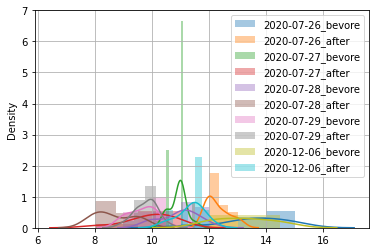

In [1]:
 # Svenja
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import pandas as pd
import seaborn as sns

right = np.array([11.5,11,15,14,14,14,13.5,13])
mean_right = np.mean(right)
std_right = np.std(right)
print(f"var_right:{std_right},:mean_right:{mean_right}")
left = np.array([9.5,14.5,15,15,13,14,13,13])
mean_left = np.mean(left)
std_left = np.std(left)
print(f"var_left:{std_left},:mean_left:{mean_left}")

### Create the Probability density function
plt.grid(True)
uebungen={"2020-07-26_uebungen":["Ball","Kopf_dehnen"],
         "2020-07-27_uebungen":["Türe","Ball","Kopf_dehnen"]}
gesamt={"2020-07-26_bevore":[14.5,15,15,13,14,13,13,11.5,11,15,14,14,14,13.5,13],
        "2020-07-26_after":[12,12,12,12.5,12,13,12,12.5,12,13,12,12.5],
        "2020-07-27_bevore":[10.5,11,11,10.5,11,11,11,10.5,11,11.5,11,11],
        "2020-07-27_after":[9, 9.5, 8., 9.5, 10, 10, 10.5, 11, 10.5, 11, 10, 10.5 ],
        "2020-07-28_bevore":[10,10,11,11,11.5,11,11.5,10,12,11,11.5,11],
        "2020-07-28_after":[9.5, 8, 9.5, 9.5, 9.5, 8.5, 8.5, 8, 8, 8., 8.5],
        "2020-07-29_bevore":[10, 9, 10, 10.5, 9,10, 10, 9.5, 9.5, 9, 10, 9.5],
        "2020-07-29_after":[10, 10.5, 9.5, 10, 9.5, 10, 9.5, 10,9, 9.5, 10, 10],
        "2020-12-06_bevore":[13.5,14.5,13.5,14.5,12.5,13,12,12],
        "2020-12-06_after":[12,11.5,11,10.5,11.5,11.5,11.5],
        }
mean = np.mean(gesamt["2020-07-26_bevore"])
std = np.std(gesamt["2020-07-26_bevore"])

for el in list(gesamt.keys()):
  print(f"##### {el} #####")
  print(f"std:{np.std(gesamt[el])},:mean:{np.mean(gesamt[el])}")
  ax = sns.distplot(gesamt[el],label=el)
  print(f"##############")
plt.legend()

# ax.axvline(35,c="b", linewidth = 3) #add a line to the graph
plt.show()


In [ ]:
from google.colab import files
gesamt={"2020-07--26-before":[13,12.7,12.5,13,12.5,12.5,  12.3,12.1,12.2,12.6,12.6,12.6,0,0,0,0],
        "2020-07-26_after":[12.5,12.6,12.8,12.7,12.6,13.1,12.3,12.3,12.6,12.7,12.3,12.2,0,0,0,0],
        "2020-07-26_after_2":[12.6,12.4,12.7,12.3,12.6,12.5,11.8,12.2,12.5,11.9,12.5,12.5,0,0,0,0],
        "2020-07-27-before":[12, 11.6, 13, 12.5, 12.5, 12.3, 12.8, 12.2,    13.2, 12.3, 12.5, 11.9, 12.5, 12.5, 12.9, 12.3],
        "2020-07-27_after":[12.5, 11.8, 12.5, 11.8, 12.7, 12.4, 12.8, 12.6, 12.6, 12.7, 12.8, 12.6, 12.7, 13,0,0],}

for el in gesamt.keys():
    print(len(gesamt[el]))
df = pd.DataFrame.from_dict(gesamt)
df.to_excel('df.xlsx')
files.download('df.xlsx')

16
16
16
16
16


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
for el in list(df_proc_fin.keys()):
  print(el)
  df_proc_fin[el] = df_proc_fin[el].astype(float)

Sunday, 26 July 2020 - Before
Sunday, 26 July 2020 - After
Monday, 27 July 2020 - Before
Monday, 27 July 2020 - After
Monday, 27 July 2020 - After_2
Tuesday, 28 July 2020 - Before
Tuesday, 28 July 2020 - After
Tuesday, 28 July 2020 - After 2
Wednesday, 29 July 2020 - Before


ValueError: ignored

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,"Sunday, 26 July 2020 - Before","Sunday, 26 July 2020 - After","Monday, 27 July 2020 - Before","Monday, 27 July 2020 - After","Monday, 27 July 2020 - After_2","Tuesday, 28 July 2020 - Before","Tuesday, 28 July 2020 - After","Tuesday, 28 July 2020 - After 2","Tuesday, 28 July 2020 - After 3","Tuesday, 28 July 2020 - After 4","Tuesday, 28 July 2020 - After 5","Wednesday, 29 July 2020 - Before","Wednesday, 29 July 2020 - After","Thursday, 30 July 2020 - Before","Thursday, 30 July 2020 - After","Friday, 31 July 2020 - Before","Friday, 31 July 2020 - After","Saturday, 1 August 2020 - Before","Saturday, 1 August 2020 - After","Sunday, 2 August 2020 - Before","Saturday, 1 August 2020 - After","Sunday, 2 August 2020 - Before","Sunday, 2 August 2020 - After","Monday, 3 August 2020 - Before","Monday, 3 August 2020 - After","Tuesday, 4 August 2020 - Before","Wednesday, 5 August 2020 - After"
2,13,12.5,12.6,12.5,12.5,11.4,11.9,11.8,11.8,11.8,11.5,11.9,11.5,,,,,,,,,,,,,,
3,12.7,12.6,12.4,12.5,11.8,11.8,12.2,11.7,11.7,11.9,12.1,12,11.9,,,,,,,,,,,,,,
4,12.5,12.8,12.7,12.9,12.5,11.9,11.7,11.8,11.8,12,11.5,11.9,11.9,,,,,,,,,,,,,,
5,13,12.7,12.3,12.3,11.8,11.8,12.1,11.8,11.8,11.5,11.7,11.8,11.9,,,,,,,,,,,,,,
6,12.5,12.6,12.6,12.5,12.7,11.6,12.1,11.5,11.5,11.5,11.5,12.2,11.5,,,,,,,,,,,,,,
7,12.5,13.1,12.5,12.3,12.4,12.1,13,12,12,11.6,12.2,11.5,12.3,,,,,,,,,,,,,,
8,12.3,12.3,11.8,12.8,12.8,12.1,12.2,12.2,12.2,11.5,11.7,12,11.8,,,,,,,,,,,,,,
9,12.1,12.3,12.2,12.2,12.6,12.5,11.8,12.2,12.2,12,11.7,11.7,12.1,,,,,,,,,,,,,,
10,12.2,12.6,12.5,13.2,12.6,12.5,12.2,12.5,12.5,12.2,12.1,12.2,11.8,,,,,,,,,,,,,,
11,12.6,12.7,11.9,12.3,12.7,12.8,12.1,12.4,12.4,12.2,12.2,12,12.1,,,,,,,,,,,,,,


##### Sunday, 26 July 2020 - Before #####
std:0.26299556396765833,:mean:12.549999999999999
##### Sunday, 26 July 2020 - After #####
std:0.24650332429581714,:mean:12.558333333333332
##### Monday, 27 July 2020 - Before #####
std:0.26809513236908994,:mean:12.375
##### Monday, 27 July 2020 - After #####
std:0.3302986863767734,:mean:12.491666666666667
##### Monday, 27 July 2020 - After_2 #####
std:0.32617309651301524,:mean:12.483333333333333
##### Tuesday, 28 July 2020 - Before #####
std:0.40173235977313165,:mean:12.083333333333334
##### Tuesday, 28 July 2020 - After #####
std:0.31743328257901515,:mean:12.141666666666667
##### Tuesday, 28 July 2020 - After 2 #####
std:0.28124228384476996,:mean:11.991666666666667
##### Tuesday, 28 July 2020 - After 3 #####
std:0.28124228384476996,:mean:11.991666666666667
##### Tuesday, 28 July 2020 - After 4 #####
std:0.3252136050181308,:mean:11.891666666666667
##### Tuesday, 28 July 2020 - After 5 #####
std:0.32776600732161887,:mean:11.858333333333333
#####

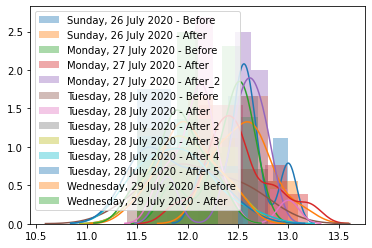

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import pandas as pd
import seaborn as sns
'#2.Step: Authorize colab to access the spread sheet'
%matplotlib notebook
%matplotlib inline
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1wkgMSGum811QOf3awF-cp_5-4vOc7RRBUFnqGpJFBNw/edit?usp=sharing')
'#3.Step: Load the measurement data  from the speadsheet'
sheet = wb.worksheet('data')
data = sheet.get_all_values()
df = pd.DataFrame(data)
'#4.Step: Combine the frist and second row (date and before|after)'
df.iloc[0] = df.iloc[0]+" - "+df.iloc[1]
'#4.1.Step: Drop the row with before| after'
df_proc = df.drop(df.index[1])
# display(df_proc.head())
'#4.2.Step: Drop column 0'
df_proc_drop = df.drop(columns=[0])
# display(df_proc_fin.head())
'#5.Step: Set first row as column name'
df_proc_fin = df_proc_drop.rename(columns=df_proc_drop.iloc[0]).drop([0,1])
display(df_proc_fin)

'# Load the exercise data from the spreadsheet'
sheet = wb.worksheet('exercise')
data = sheet.get_all_values()
df_exercise = pd.DataFrame(data)
df_exercise = df_exercise.rename(columns=df_exercise.iloc[0]).drop([0])
df_exercise.head()

# Visualize the data
for el in list(df_proc_fin.loc[:,:"Wednesday, 29 July 2020 - After"].keys()):
  print(f"##### {el} #####")
  df_proc_fin[el] = df_proc_fin[el].astype(float)
  print(f"std:{np.std(df_proc_fin[el].values)},:mean:{np.mean(df_proc_fin[el].values)}")
  ax = sns.distplot(df_proc_fin[el].values,label=el)
plt.legend()

##### Sunday, 26 July 2020 - Before #####
std:0.26299556396765833,:mean:12.549999999999999
##### Sunday, 26 July 2020 - After #####
std:0.24650332429581714,:mean:12.558333333333332
##### Monday, 27 July 2020 - Before #####
std:0.26809513236908994,:mean:12.375
##### Monday, 27 July 2020 - After #####
std:0.3302986863767734,:mean:12.491666666666667
##### Monday, 27 July 2020 - After_2 #####
std:0.32617309651301524,:mean:12.483333333333333
##### Tuesday, 28 July 2020 - Before #####
std:0.40173235977313165,:mean:12.083333333333334
##### Tuesday, 28 July 2020 - After #####
std:0.31743328257901515,:mean:12.141666666666667
##### Tuesday, 28 July 2020 - After 2 #####
std:0.28124228384476996,:mean:11.991666666666667


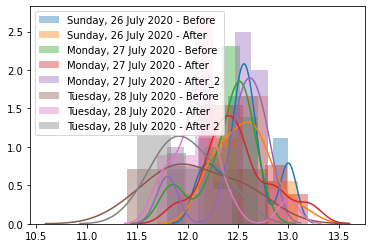

In [ ]:
import datetime
from datetime import date
import pandas as pd
import numpy as np
from plotly import __version__
%matplotlib inline

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 


cf.go_offline()

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))
  
df = pd.DataFrame({
    'month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Year_2018': [3.26, 6.11, 4.86, 6.53, 4.45, 3.86, 8.04, 7.59, 1.48, 4.75, 7.27, 11.83],
    'Year_1996': [8.26, 3.82, 6.42, 2.91, 2.12, 1.70, 2.14, 4.66, 4.32, 0.89, 3.22, 4.14]
}
)
df

configure_plotly_browser_state()
for el in list(df_proc_fin.loc[:,:"Tuesday, 28 July 2020 - After 2"].keys()):
  print(f"##### {el} #####")
  df_proc_fin[el] = df_proc_fin[el].astype(float)
  print(f"std:{np.std(df_proc_fin[el].values)},:mean:{np.mean(df_proc_fin[el].values)}")
  ax = sns.distplot(df_proc_fin[el].values,label=el)
plt.legend()
df.iplot(kind='line',x='month',y=['Year_2018', 'Year_1996'], color=['white', 'gold'], 
theme='solar', mode='markers+lines',title='Annual Rainfall in the city Peachtree City, GA')
plt.show()

In [ ]:
#PLot the data from df
for el in list(gesamt.keys()):
  print(f"##### {el} #####")
  print(f"std:{np.std(gesamt[el])},:mean:{np.mean(gesamt[el])}")
  ax = sns.distplot(gesamt[el],label=el)
  print(f"##############")
plt.legend()

# ax.axvline(35,c="b", linewidth = 3) #add a line to the graph
plt.show()

##### 2020-07--26-before #####
std:0.26299556396765833,:mean:12.549999999999999
##############
##### 2020-07-26_after #####
std:0.24650332429581714,:mean:12.558333333333332
##############
##### 2020-07-26_after_2 #####
std:0.26809513236908994,:mean:12.375
##############
##### 2020-07-27-before #####
std:0.39980463979298686,:mean:12.4375
##############
##### 2020-07-27_after #####
std:0.3329674863087616,:mean:12.535714285714283
##############


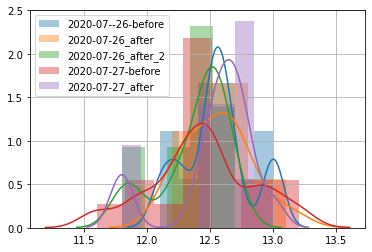

In [ ]:
# Gustav
### Create the Probability density function
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import pandas as pd
import seaborn as sns



"""
'#2.Step: Authorize colab to access the spread sheet'
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1wkgMSGum811QOf3awF-cp_5-4vOc7RRBUFnqGpJFBNw/edit?usp=sharing')
'#3.Step: Load the data from the speadsheet'
sheet = wb.worksheet('gustav')
data = sheet.get_all_values()
df = pd.DataFrame(data)
"""
##################
plt.grid(True)
uebungen={"2020-07-26_uebungen":["Ball","Kopf_dehnen"],
         "2020-07-27_uebungen":["Türe_dehnen","Supermann","dog","strecken_couch"]}
#Übungen für morgen: https://westcoastsci.com/general-blog/2018/11/2/hunchback-of-notre-dont-5-easy-exercises-to-correct-thoracic-kyphosis
gesamt={"2020-07--26-before":[13,12.7,12.5,13,12.5,12.5,  12.3,12.1,12.2,12.6,12.6,12.6,0,0,0,0],
        "2020-07-26_after":[12.5,12.6,12.8,12.7,12.6,13.1,12.3,12.3,12.6,12.7,12.3,12.2,0,0,0,0],
        "2020-07-26_after_2":[12.6,12.4,12.7,12.3,12.6,12.5,11.8,12.2,12.5,11.9,12.5,12.5,0,0,0,0],
        "2020-07-27-before":[12, 11.6, 13, 12.5, 12.5, 12.3, 12.8, 12.2,    13.2, 12.3, 12.5, 11.9, 12.5, 12.5, 12.9, 12.3],
        "2020-07-27_after":[12.5, 11.8, 12.5, 11.8, 12.7, 12.4, 12.8, 12.6, 12.6, 12.7, 12.8, 12.6, 12.7, 13,0,0],}


for el in list(gesamt.keys()):
  print(f"##### {el} #####")
  print(f"std:{np.std(gesamt[el])},:mean:{np.mean(gesamt[el])}")
  ax = sns.distplot(gesamt[el],label=el)
  print(f"##############")
plt.legend()

# ax.axvline(35,c="b", linewidth = 3) #add a line to the graph
plt.show()





In [ ]:
 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import seaborn as sns
mu = 4
variance = 4**0.5
sigma = math.sqrt(variance)
### Create the Probability density function
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
ax = sns.lineplot(x, stats.norm.pdf(x, mu, sigma))
# ax.axvline(35,c="b", linewidth = 3) #add a line to the graph
part = np.arange(,40,1)
ax.fill_between(part,stats.norm.pdf(part, mu, sigma),)
plt.show()
 
### Create the cumulative distribution function
ax = sns.lineplot(x, stats.norm.cdf(x, mu, sigma))
 
ax.fill_between(x, stats.norm.cdf(x, mu, sigma))